In [1]:
# %matplotlib inline

import math
import random

from plotting import PlotType, Plotter
from simulating import Simulator, SimStep2d

In [2]:
max_acc = 3.0
max_vel = 2.0
global_save_figures = False

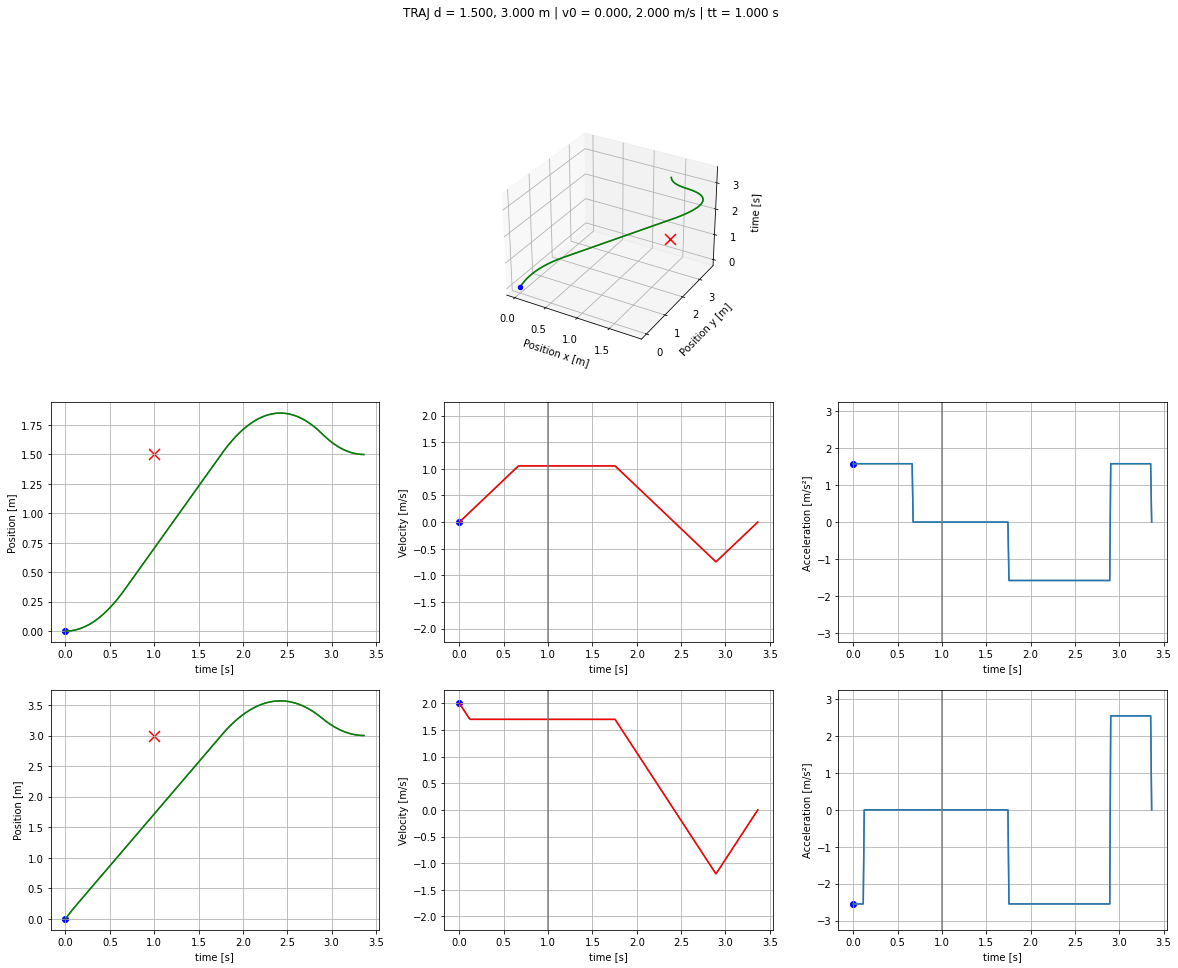

In [3]:
from traj import Vec2

distances = [Vec2(1.5, 3)]
initial_velocities = [Vec2(0, 2)]
target_times = [1]

for d in sorted(set(distances)):
    for i_v in sorted(set(initial_velocities)):
        for tt in sorted(set(target_times)):
            fig = Plotter.plot(d, i_v, tt, max_acc, max_vel, PlotType.TRAJ)

In [4]:
test_values = [
    (0.0, 0.0, 0.0),
    (0.0, 1.0, 0.0),
    (0.0, 1.0, 1.0),
    (0.0, 1.0, 1.1),
    (0.5, 2.0, 0.5),
    (0.5, 2.0, 0.92),
    (1.0, 1.0, 0.5),
    (1.0, 1.0, 0.6),
    (1.0, 1.0, 1.0),
    (2.0, 2.0, 1.1),
    (2.0, 2.0, 2.0),
    (1.0, 0.0, 1.0),
]

for values in test_values:
    Plotter.plot(values[0], values[1], values[2], max_acc, max_vel, PlotType.NONE)

In [5]:
test_values = [
    ((-1.5, -3), (2, 0), 2.3),
    ((1, 0.5), (0, 0), 1),
    ((-1.5, -3), (0, 0), 2.2),
    ((-1, 0.5), (0, 0), 1),
    ((-1.5, -3), (0, 0), 2.6),
    ((-1.5, -3), (0, 0), 2.5),
    ((-1.5, -3), (0, 0), 2.4),
    ((-1.5, -3), (0, 0), 2.3),
]

for value in test_values:
    distance = Vec2(*value[0])
    initial_vel = Vec2(*value[1])
    target_time = value[2]
    Plotter.plot(distance, initial_vel, target_time, max_vel, max_acc, PlotType.SIM_TRAJ, show_fig=False)
    Plotter.plot(distance, initial_vel, target_time, max_vel, max_acc, PlotType.NONE)

In [6]:
random.seed(1)
n_total = 0.0
n_close = 0.0
error_sum = 0.0
for _ in range(100):
    distance_x = random.uniform(-3, 3)
    distance_y = random.uniform(-3, 3)
    distance = Vec2(distance_x, distance_y)
    v0x = random.uniform(-max_vel, max_vel)
    v0y = random.uniform(-max_vel, max_vel)
    v0 = Vec2(v0x, v0y)
    target_time = random.uniform(0, 3)

    if math.isclose(target_time, 0.0, abs_tol=1e-4) or (
            math.isclose(distance_x, 0.0, abs_tol=1e-4) and math.isclose(distance_y, 0.0, abs_tol=1e-4)):
        continue

    try:
        sim_steps = Simulator(
            max_vel=max_vel,
            max_acc=max_acc,
            num_steps=40,
            step_size=5,
            distance=distance,
            initial_vel=v0,
            target_time=target_time).simulate()
        for step in sim_steps:
            if isinstance(step, SimStep2d):
                n_total += 1
                if math.isclose(step.alpha, step.optimal_alpha, abs_tol=1e-6):
                    n_close += 1
                else:
                    error_sum += math.fabs(step.alpha - step.optimal_alpha)

        if isinstance(distance, Vec2):
            assert math.isclose(sim_steps[-1].current_pos().x, distance.x, abs_tol=1e-4,
                                rel_tol=1e-4), "{} != {}".format(sim_steps[-1].current_pos().x, distance.x)
            assert math.isclose(sim_steps[-1].current_pos().y, distance.y, abs_tol=1e-4,
                                rel_tol=1e-4), "{} != {}".format(sim_steps[-1].current_pos().y, distance.y)
        else:
            assert math.isclose(sim_steps[-1].current_pos(), distance, abs_tol=1e-4,
                                rel_tol=1e-4), "{} != {}".format(sim_steps[-1].current_pos(), distance)
    except Exception as e:
        print("({}), ({}), {} failed".format(distance, v0, target_time))
        raise AssertionError(e)
print("Success!")
if n_total > 0:
    print("Alphas Match: {} / {}".format(n_close, n_total))
    print("     with avg. error: {}".format(error_sum / (n_total + n_close)))

(-0.062, -2.823), (-1.826, 0.814), 2.9495631519290217 failed


AssertionError: -0.059145545678704614 != -0.06183887722645043